In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Load the dataset

# seems like seed doesn't affect anything, same results no matter what?
# maybe just caching? because it does seem like results change when the whole
# notebook reloads
np.random.seed(23)

truenews = pd.read_csv('/content/True.csv')
fakenews = pd.read_csv('/content/Fake.csv')




In [ ]:
fakenews.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
fakenews.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [ ]:
truenews.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
truenews.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [ ]:
truenews = truenews[truenews.duplicated('text') == False]
fakenews = fakenews[fakenews.duplicated('text') == False]

In [ ]:
fakenews.describe()

,title,text,subject,date
count,17455,17455,17455,17455
unique,17450,17455,5,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,Donald Trump just couldn t wish all Americans ...,News,"May 26, 2016"
freq,3,1,9050,35


In [ ]:
truenews.describe()

,title,text,subject,date
count,21192,21192,21192,21192
unique,20821,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 6, 2017"
freq,14,1,11214,166


In [ ]:
truenews['True/Fake']='True'
fakenews['True/Fake']='Fake'

In [ ]:

# Combine the 2 DataFrames into a single data frame
news = pd.concat([truenews, fakenews])
#news["Article"] = news["title"] + news["text"]
news["Article"] = news["title"]
#news["Article"] = news["text"]
news.sample(frac = 1) #Shuffle 100%

,title,text,subject,date,True/Fake,Article
5764,U.S. military posture unchanged after Iran mis...,WASHINGTON (Reuters) - The United States milit...,politicsNews,"February 1, 2017",True,U.S. military posture unchanged after Iran mis...
13722,FATHER SPEAKS OUT After Son Was Attacked By Mo...,"After being assaulted by Trump haters, the Tru...",politics,"Jun 10, 2016",Fake,FATHER SPEAKS OUT After Son Was Attacked By Mo...
17219,Iran aircraft deals hang by thread as Trump ta...,PARIS (Reuters) - President Donald Trump s haw...,worldnews,"October 17, 2017",True,Iran aircraft deals hang by thread as Trump ta...
11296,Turkey's Erdogan calls Syria's Assad a terrori...,TUNIS (Reuters) - Turkish President Tayyip Erd...,worldnews,"December 27, 2017",True,Turkey's Erdogan calls Syria's Assad a terrori...
7057,Beyoncé Just Let Us Know Her True Feelings On...,After Beyonc released her song Formation an...,News,"April 6, 2016",Fake,Beyoncé Just Let Us Know Her True Feelings On...
...,...,...,...,...,...,...
6215,"Exclusive: Pentagon, Lockheed near deal on $9 ...",WASHINGTON (Reuters) - The U.S. Department of ...,politicsNews,"January 19, 2017",True,"Exclusive: Pentagon, Lockheed near deal on $9 ..."
9755,In the battle for Hollywood endorsements - and...,LOS ANGELES (Reuters) - Democratic presidentia...,politicsNews,"April 26, 2016",True,In the battle for Hollywood endorsements - and...
11248,New York's Cuomo proposes $145.3 billion budge...,"ALBANY, N.Y. (Reuters) - New York Governor And...",politicsNews,"January 13, 2016",True,New York's Cuomo proposes $145.3 billion budge...
5377,NBA Yanks All-Star Game Out Of Charlotte Over...,"North Carolina s anti-transgender law, HB2, ha...",News,"July 21, 2016",Fake,NBA Yanks All-Star Game Out Of Charlotte Over...


In [ ]:
#Data Cleaning
import nltk
#nltk.download('stopwords')
#from nltk.corpus import stopwords
import string

In [ ]:
#def process_text(article):

    #Check string to see if they are a punctuation
    #nopunc = [char for char in s if char not in string.punctuation]

    #Join the characters again to form the string.
    #nopunc = ''.join(nopunc)

    #Convert string to lowercase and remove stopwords
    #clean_string = " ".join([word.lower() for word in article.split() if word.lower() not in stopwords.words('english')])
    #eturn clean_string



In [ ]:
#news['Clean Text'] = [process_text(article) for article in article_array]


In [ ]:
import re


In [ ]:
#Get rid of (Routers) tags
#news['Clean Text'] = news['Article'].apply(lambda x: re.sub(".{0,50}\(Reuters\)", " ", x))
#Remove any bit.ly addresses
#news['Clean Text'] = news['Clean Text'].apply(lambda x: re.sub("[^ ]*bit\.ly[^ ]*", " ", x))
#Add spaces after numbers
#news['Clean Text'] = news['Clean Text'].apply(lambda x: re.sub("([0-9]+)([a-zA-Z])", lambda x: x.group(1)+" "+x.group(2), x))


In [ ]:
#news['Clean Text New'] = news['Clean Text'].apply(lambda x: ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))

In [ ]:
nltk.download('words')

from nltk.corpus import words

# Your array of text
article_array = news["Article"]

# Set of English words
english_word_set = set(words.words())

# Function to filter words based on the English dictionary
def filter_english_words(article):
    #return ' '.join([word.lower() for word in article.split() if word.lower() in english_word_set and word.lower() not in set(stopwords.words('english'))])
    return ' '.join([word.lower() for word in article.split() if word.lower() in english_word_set])

# Apply the filter to each article in the array
filtered_articles = [filter_english_words(article) for article in article_array]

# Update the original array with the filtered results
news['Clean Text'] = filtered_articles

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
#re.sub("[0-9]+[a-zA-Z]+", " ", ' '.join(list(news['Article'][30])))

In [ ]:
list(news['Clean Text'])[30]

'to certify democrat winner of senate election'

In [ ]:
# Split the data into features (X) and labels (y)
X = news['Clean Text']  # Assuming 'text_column' contains the news text
y = news['True/Fake']  # Assuming 'label_column' contains the labels (fake or real)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Convert text data to a bag-of-words representation
#bow_transformer = CountVectorizer(analyzer=process_text).fit(news['Clean Text'])
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
print(X_train)

10290    media for public testimony proving fake dossie...
14028    how voting for trump will help to export our t...
5839                               if trump to ban sue him
18573        why are less likely to integrate into western
2282     to sue trump administration over sanctuary cit...
                               ...                        
6305      russia ready to rebuild security with under ally
11353    kremlin ready to mediate north if both sides w...
22214             request to halt construction of declined
864       mother of young new yorker among of truck attack
15987                                     pregnant to from
Name: Clean Text, Length: 30917, dtype: object


In [ ]:
print(list(vectorizer.vocabulary_.items())[-10:])

[('preparation', 5706), ('entertain', 2595), ('tamp', 7609), ('fruitful', 3181), ('chopping', 1284), ('vincent', 8402), ('aardvark', 1), ('anxiously', 329), ('axed', 530), ('northwest', 5041)]


In [ ]:
#print(len(bow_transformer.vocabulary_)) #Total vocab words
print(len(vectorizer.vocabulary_))

8749


In [ ]:
#news_bow = bow_transformer.transform(news['Clean Text'])

In [ ]:
# Create and train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

In [ ]:
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test_vectorized)

In [ ]:
# Evaluate the performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.890038809831824
Classification Report:
               precision    recall  f1-score   support

        Fake       0.87      0.88      0.88      3486
        True       0.90      0.90      0.90      4244

    accuracy                           0.89      7730
   macro avg       0.89      0.89      0.89      7730
weighted avg       0.89      0.89      0.89      7730

Confusion Matrix:
 [[3076  410]
 [ 440 3804]]


In [ ]:
class_names = nb_classifier.classes_


In [ ]:

# Extract feature names from the vectorizer
#feature_names = np.array(bow_transformer.get_feature_names_out())
feature_names = np.array(vectorizer.get_feature_names_out())



# Get the log probabilities for each class (assuming MultinomialNB)
class_probabilities = nb_classifier.feature_log_prob_

# Calculate the feature importance scores
feature_importances = class_probabilities[1] - class_probabilities[0]

# Get indices of the top words associated with true news
top_fake_indices = feature_importances.argsort()[:100]

# Get indices of the top words associated with fake news
top_true_indices = feature_importances.argsort()[-100:][::-1]

# Get the corresponding words
top_true_words = feature_names[top_true_indices]
top_fake_words = feature_names[top_fake_indices]

In [ ]:
# Print the top words associated with true news
print("Top words associated with true news:")
print(top_true_words)

# Print the top words associated with fake news
print("\nTop words associated with fake news:")
print(top_fake_words)

Top words associated with true news:
['xi' 'envoy' 'urge' 'zimbabwe' 'ria' 'referendum' 'parliament'
 'opposition' 'graft' 'turkey' 'region' 'remains' 'dialogue' 'macron'
 'regional' 'kremlin' 'seek' 'pension' 'resume' 'inquiry' 'quake'
 'overhaul' 'limit' 'northern' 'argentine' 'hong' 'coalition' 'southeast'
 'eu' 'concern' 'banking' 'labour' 'moon' 'unveil' 'resolve' 'package'
 'extend' 'dispute' 'alliance' 'pacific' 'fuel' 'trade' 'chile' 'phase'
 'consider' 'weigh' 'pursue' 'summons' 'boost' 'extension' 'strengthen'
 'tusk' 'regulator' 'south' 'reform' 'consumer' 'tass' 'compromise'
 'ministry' 'separatist' 'capital' 'withdrawal' 'atlantic' 'abbas'
 'improve' 'revamp' 'sacked' 'missile' 'peninsula' 'independence' 'gains'
 'finance' 'geneva' 'smuggling' 'sisi' 'premier' 'lifting' 'sri'
 'crackdown' 'bipartisan' 'japan' 'sea' 'deadly' 'spokesman' 'diplomat'
 'china' 'amid' 'minister' 'skeptical' 'quick' 'dissident' 'kingmaker'
 'expansion' 'troop' 'stocks' 'bali' 'revive' 'bid' 'hope

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon (if not already downloaded)
nltk.download('vader_lexicon')

# Create a SentimentIntensityAnalyzer instance
sid = SentimentIntensityAnalyzer()

# Get sentiment scores for each word
sentiment_scores_true = {word: sid.polarity_scores(word)['compound'] for word in top_true_words}
sentiment_scores_fake = {word: sid.polarity_scores(word)['compound'] for word in top_fake_words}

# Print sentiment scores
for word, score in sentiment_scores_true.items():
    print(f"{word}: {score}")



xi: 0.0
envoy: 0.0
urge: 0.0
zimbabwe: 0.0
ria: 0.0
referendum: 0.0
parliament: 0.0
opposition: 0.0
graft: 0.0
turkey: 0.0
region: 0.0
remains: 0.0
dialogue: 0.0
macron: 0.0
regional: 0.0
kremlin: 0.0
seek: 0.0
pension: 0.0
resume: 0.0
inquiry: 0.0
quake: 0.0
overhaul: 0.0
limit: 0.0
northern: 0.0
argentine: 0.0
hong: 0.0
coalition: 0.0
southeast: 0.0
eu: 0.0
concern: 0.0
banking: 0.0
labour: 0.0
moon: 0.0
unveil: 0.0
resolve: 0.3818
package: 0.0
extend: 0.1779
dispute: -0.4019
alliance: 0.0
pacific: 0.0
fuel: 0.0
trade: 0.0
chile: 0.0
phase: 0.0
consider: 0.0
weigh: 0.0
pursue: 0.0
summons: 0.0
boost: 0.4019
extension: 0.0
strengthen: 0.3182
tusk: 0.0
regulator: 0.0
south: 0.0
reform: 0.0
consumer: 0.0
tass: 0.0
compromise: 0.0
ministry: 0.0
separatist: 0.0
capital: 0.0
withdrawal: 0.0258
atlantic: 0.0
abbas: 0.0
improve: 0.4404
revamp: 0.0
sacked: 0.0
missile: 0.0
peninsula: 0.0
independence: 0.0
gains: 0.34
finance: 0.0
geneva: 0.0
smuggling: -0.4767
sisi: 0.0
premier: 0.0
lifting: 

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Print sentiment scores
for word, score in sentiment_scores_fake.items():
    print(f"{word}: {score}")



supporter: 0.2732
hilarious: 0.4019
hilariously: 0.0
you: 0.0
perfect: 0.5719
racist: -0.6124
joe: 0.0
boiler: 0.0
brilliant: 0.5859
insane: -0.4019
epic: 0.0
disgusting: -0.5267
something: 0.0
bundy: 0.0
shocking: -0.4019
just: 0.0
perfectly: 0.6369
actually: 0.0
absolutely: 0.0
yr: 0.0
furious: -0.5719
bombshell: 0.0
crooked: 0.0
brutally: -0.6124
went: 0.0
guy: 0.0
awesome: 0.6249
brutal: -0.6249
tucker: 0.0
busted: 0.0
because: 0.0
wearing: 0.0
amazing: 0.5859
lie: 0.0
pathetic: -0.5719
rep: 0.0
totally: 0.0
ca: 0.0
accidentally: -0.34
hypocrite: 0.0
newt: 0.0
ridiculous: -0.3612
rant: -0.34
cop: 0.0
exactly: 0.0
seth: 0.0
guess: 0.0
embarrassing: -0.3818
literally: 0.0
tantrum: -0.4215
radical: 0.0
guest: 0.0
brilliantly: 0.6124
glorious: 0.6369
thug: 0.0
room: 0.0
everyone: 0.0
reportedly: 0.0
disturbing: -0.5106
scathing: 0.0
stunning: 0.3818
jake: 0.0
expose: -0.1531
gone: 0.0
openly: 0.0
phony: 0.0
these: 0.0
alien: 0.0
every: 0.0
store: 0.0
tapper: 0.0
god: 0.2732
breaking: 0

In [ ]:
non_zero_true_count = 0
non_zero_fake_count = 0

# Count non-zero scores for true words
for score in sentiment_scores_true.values():
    if score != 0:
        non_zero_true_count += 1

# Count non-zero scores for fake words
for score in sentiment_scores_fake.values():
    if score != 0:
        non_zero_fake_count += 1

# Print the counts
print("Non-zero scores for true words:", non_zero_true_count)
print("Non-zero scores for fake words:", non_zero_fake_count)

Non-zero scores for true words: 13
Non-zero scores for fake words: 33


In [ ]:
sentiment_scores_true_df = pd.DataFrame(dict(word = sentiment_scores_true.keys(), score = sentiment_scores_true.values(), fake = False))
sentiment_scores_fake_df = pd.DataFrame(dict(word = sentiment_scores_fake.keys(), score = sentiment_scores_fake.values(), fake = True))
sentiment_scores_df_long = pd.concat([sentiment_scores_true_df, sentiment_scores_fake_df])
sentiment_scores_df_long.to_csv("news_headlines_sentiment_scores_df_long.csv")

sentiment_scores_df_wide = pd.DataFrame(dict(true_word = sentiment_scores_true.keys(), true_score = sentiment_scores_true.values(), fake_word = sentiment_scores_fake.keys(), fake_score = sentiment_scores_fake.values()))
sentiment_scores_df_wide.to_csv("news_headlines_sentiment_scores_df_wide.csv")

In [ ]:
non_zero_count = sum(1 for word, score in sentiment_scores_true.items() if score != 0)
true_positive_sentiment_count = sum(1 for word, score in sentiment_scores_true.items() if score > 0)
true_negative_sentiment_count = sum(1 for word, score in sentiment_scores_true.items() if score < 0)

print(f"Number of fake feature words with positive sentiment score: {true_positive_sentiment_count}")
print(f"Number of fake feature words with negative sentiment score: {true_negative_sentiment_count}")

print(f"Number of true feature words with a non-zero sentiment score: {non_zero_count}")

non_zero_count = sum(1 for word, score in sentiment_scores_fake.items() if score != 0)
fake_positive_sentiment_count = sum(1 for word, score in sentiment_scores_fake.items() if score > 0)
fake_negative_sentiment_count = sum(1 for word, score in sentiment_scores_fake.items() if score < 0)

print(f"Number of fake feature words with positive sentiment score: {fake_positive_sentiment_count}")
print(f"Number of fake feature words with negative sentiment score: {fake_negative_sentiment_count}")
print(f"Number of fake feature words with a non-zero sentiment score: {non_zero_count}")

Number of fake feature words with positive sentiment score: 9
Number of fake feature words with negative sentiment score: 4
Number of true feature words with a non-zero sentiment score: 13
Number of fake feature words with positive sentiment score: 13
Number of fake feature words with negative sentiment score: 20
Number of fake feature words with a non-zero sentiment score: 33


In [ ]:
# Find the word with the highest and lowest score for true words
max_true_word = max(sentiment_scores_true, key=sentiment_scores_true.get)
min_true_word = min(sentiment_scores_true, key=sentiment_scores_true.get)
max_true_score = sentiment_scores_true[max_true_word]
min_true_score = sentiment_scores_true[min_true_word]

# Find the word with the highest and lowest score for fake words
max_fake_word = max(sentiment_scores_fake, key=sentiment_scores_fake.get)
min_fake_word = min(sentiment_scores_fake, key=sentiment_scores_fake.get)
max_fake_score = sentiment_scores_fake[max_fake_word]
min_fake_score = sentiment_scores_fake[min_fake_word]

# Print the highest and lowest scores along with their corresponding words for true words
print("Highest score for true words:", max_true_word, ":", max_true_score)
print("Lowest score for true words:", min_true_word, ":", min_true_score)

# Print the highest and lowest scores along with their corresponding words for fake words
print("Highest score for fake words:", max_fake_word, ":", max_fake_score)
print("Lowest score for fake words:", min_fake_word, ":", min_fake_score)

Highest score for true words: hopeful : 0.5106
Lowest score for true words: smuggling : -0.4767
Highest score for fake words: perfectly : 0.6369
Lowest score for fake words: hell : -0.6808


In [ ]:
# Initialize counters for positive and negative scores
positive_true_count = 0
negative_true_count = 0
positive_fake_count = 0
negative_fake_count = 0

# Count positive and negative scores for true words
for score in sentiment_scores_true.values():
    if score > 0:
        positive_true_count += 1
    elif score < 0:
        negative_true_count += 1

# Count positive and negative scores for fake words
for score in sentiment_scores_fake.values():
    if score > 0:
        positive_fake_count += 1
    elif score < 0:
        negative_fake_count += 1

# Print the counts
print("Positive scores for true words:", positive_true_count)
print("Negative scores for true words:", negative_true_count)
print("Positive scores for fake words:", positive_fake_count)
print("Negative scores for fake words:", negative_fake_count)

Positive scores for true words: 9
Negative scores for true words: 4
Positive scores for fake words: 13
Negative scores for fake words: 20


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud



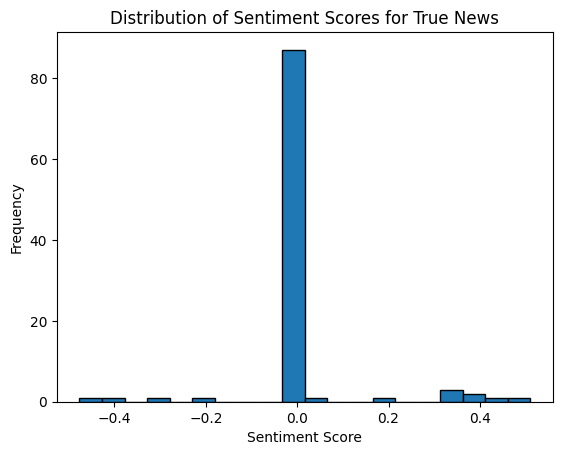

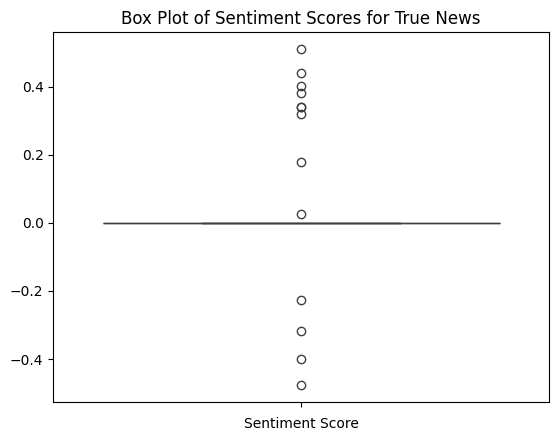

Statistics for Sentiment Scores of True News
Mean: 0.015135000000000003
Median: 0.0
Standard Deviation: 0.12825939604956824




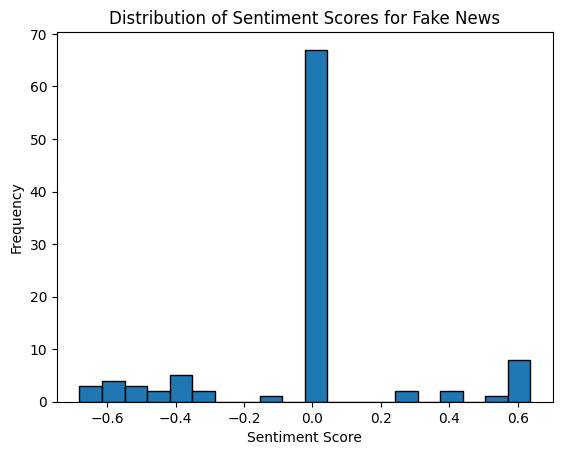

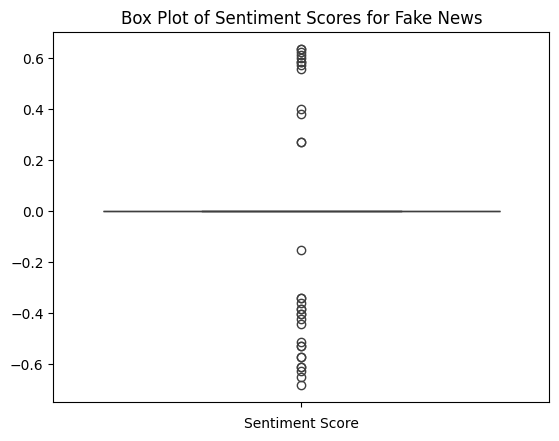

Statistics for Sentiment Scores of Fake News
Mean: -0.027687999999999994
Median: 0.0
Standard Deviation: 0.29165138068591406




In [ ]:
def calculate_and_plot_statistics(sentiment_scores, title):
    # Descriptive Statistics
    mean_score = np.mean(list(sentiment_scores.values()))
    median_score = np.median(list(sentiment_scores.values()))
    std_dev = np.std(list(sentiment_scores.values()))

    # Histogram
    plt.hist(list(sentiment_scores.values()), bins=20, edgecolor='black')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Sentiment Scores for {title}')
    plt.show()

    # Box Plot
    sns.boxplot(list(sentiment_scores.values()))
    plt.xlabel('Sentiment Score')
    plt.title(f'Box Plot of Sentiment Scores for {title}')
    plt.show()

    # Print Statistics
    print(f"Statistics for Sentiment Scores of {title}")
    print(f"Mean: {mean_score}")
    print(f"Median: {median_score}")
    print(f"Standard Deviation: {std_dev}")
    print("\n")

# Calculate and plot for true news
calculate_and_plot_statistics(sentiment_scores_true, "True News")

# Calculate and plot for fake news
calculate_and_plot_statistics(sentiment_scores_fake, "Fake News")


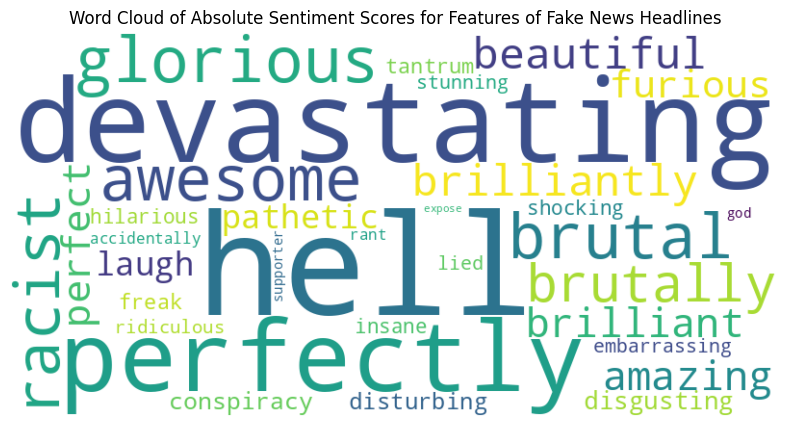

In [ ]:
from wordcloud import WordCloud

# Assuming sentiment_scores_true and sentiment_scores_fake are dictionaries with words as keys and sentiment scores as values

# Function to generate and plot word cloud with absolute values of sentiment scores
def generate_and_plot_wordcloud_absolute(sentiment_scores, title):
    # Calculate absolute values of sentiment scores
    sentiment_scores_absolute = {word: abs(score) for word, score in sentiment_scores.items()}

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(sentiment_scores_absolute)

    # Plot word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud of Absolute Sentiment Scores for Features of {title}')
    plt.show()

# Generate and plot word cloud for fake news with absolute sentiment scores
generate_and_plot_wordcloud_absolute(sentiment_scores_fake, "Fake News Headlines")


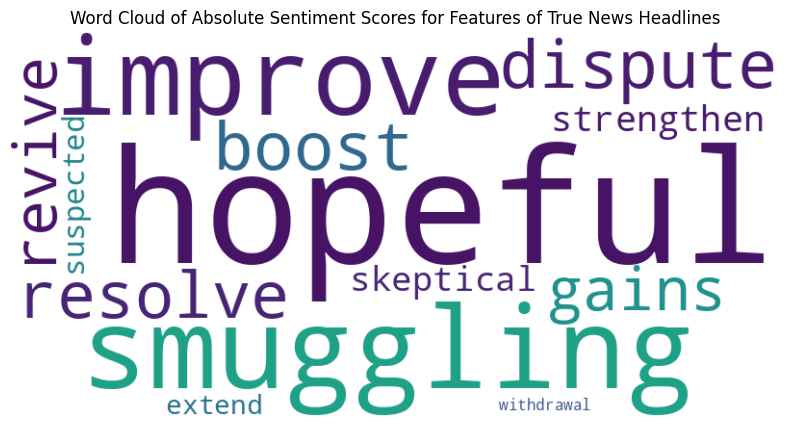

In [ ]:
# Generate and plot word cloud for fake news with absolute sentiment scores
generate_and_plot_wordcloud_absolute(sentiment_scores_true, "True News Headlines")

In [ ]:
#assessing emotion of top words

# Access the NRC Emotion Lexicon
lexicon = pd.read_csv('/content/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt', names=["word", "emotion", "value"], sep='\t', keep_default_na=False)

def get_emotions(word):
    # Check if the word is in the 'word' column of the lexicon
    if word in lexicon['word'].values:
        # Filter the DataFrame to get emotions where 'value' is 1
        emotions = list(lexicon.loc[lexicon['word'] == word, 'emotion'][lexicon['value'] == 1])
        return emotions
    else:
        return []

def analyze_word_list(word_list):
    word_emotions = {}
    for word in word_list:
        emotions = get_emotions(word)
        if emotions:
            word_emotions[word] = emotions
    return word_emotions

# Analyze emotions for true words
true_word_emotions = analyze_word_list(top_true_words)
print("Emotions for true words:", true_word_emotions)

# Analyze emotions for fake words
fake_word_emotions = analyze_word_list(top_fake_words)
print("Emotions for fake words:", fake_word_emotions)

Emotions for true words: {'parliament': ['trust'], 'opposition': ['anger', 'negative'], 'remains': ['disgust', 'fear', 'negative', 'positive', 'trust'], 'seek': ['anticipation'], 'inquiry': ['anticipation', 'positive'], 'quake': ['fear'], 'coalition': ['positive'], 'extend': ['positive'], 'dispute': ['anger', 'negative'], 'alliance': ['trust'], 'pacific': ['positive'], 'trade': ['trust'], 'weigh': ['anticipation', 'trust'], 'summons': ['negative'], 'strengthen': ['positive'], 'reform': ['positive'], 'ministry': ['joy', 'positive', 'trust'], 'separatist': ['anger', 'disgust', 'negative'], 'improve': ['anticipation', 'joy', 'positive', 'trust'], 'missile': ['fear'], 'independence': ['anticipation', 'joy', 'positive', 'surprise', 'trust'], 'smuggling': ['negative'], 'premier': ['positive'], 'sea': ['positive'], 'deadly': ['anger', 'disgust', 'fear', 'negative', 'sadness'], 'spokesman': ['trust'], 'skeptical': ['negative'], 'dissident': ['anger', 'fear', 'negative'], 'stocks': ['negative']

In [ ]:
# Count the number of words in true_word_emotions with any emotion
num_true_words_with_emotion = sum(1 for emotions in true_word_emotions.values() if emotions)

# Count the number of words in fake_word_emotions with any emotion
num_fake_words_with_emotion = sum(1 for emotions in fake_word_emotions.values() if emotions)

print("Number of true words with emotion:", num_true_words_with_emotion)
print("Number of fake words with emotion:", num_fake_words_with_emotion)

Number of true words with emotion: 31
Number of fake words with emotion: 35


In [ ]:
from collections import Counter

# Function to count the number of words for each emotion
def count_emotions(word_emotions):
    emotion_counts = Counter(emotion for emotions in word_emotions.values() for emotion in emotions)
    return emotion_counts

# Count emotions for true words
true_emotion_counts = count_emotions(true_word_emotions)

# Count emotions for fake words
fake_emotion_counts = count_emotions(fake_word_emotions)

# Print the results
print("Emotion counts for true words:", true_emotion_counts)
print("Emotion counts for fake words:", fake_emotion_counts)

Emotion counts for true words: Counter({'positive': 14, 'negative': 11, 'trust': 10, 'anticipation': 7, 'anger': 5, 'fear': 5, 'joy': 4, 'disgust': 3, 'surprise': 2, 'sadness': 1})
Emotion counts for fake words: Counter({'negative': 17, 'fear': 14, 'positive': 13, 'anger': 12, 'disgust': 12, 'joy': 8, 'trust': 8, 'anticipation': 8, 'surprise': 5, 'sadness': 4})


In [ ]:
# display emotions of each word
from tabulate import tabulate

# Convert dictionaries to lists of lists for tabulation
true_table_data = [(word, ', '.join(emotions)) for word, emotions in true_word_emotions.items()]
fake_table_data = [(word, ', '.join(emotions)) for word, emotions in fake_word_emotions.items()]

# Create tables using tabulate
true_table = tabulate(true_table_data, headers=['Word', 'Emotions'], tablefmt='grid', numalign="center")
fake_table = tabulate(fake_table_data, headers=['Word', 'Emotions'], tablefmt='grid', numalign="center")

# Print or display the tables
print("True Word Emotions:")
print(true_table)

print("\nFake Word Emotions:")
print(fake_table)

True Word Emotions:
+--------------+----------------------------------------------+
| Word         | Emotions                                     |
+==============+==============================================+
| parliament   | trust                                        |
+--------------+----------------------------------------------+
| opposition   | anger, negative                              |
+--------------+----------------------------------------------+
| remains      | disgust, fear, negative, positive, trust     |
+--------------+----------------------------------------------+
| seek         | anticipation                                 |
+--------------+----------------------------------------------+
| inquiry      | anticipation, positive                       |
+--------------+----------------------------------------------+
| quake        | fear                                         |
+--------------+----------------------------------------------+
| coalition    | pos

In [ ]:
# count up each emotion

from collections import Counter

# Function to count emotions for a given dictionary
def count_emotions(word_emotions):
    all_emotions = [emotion for emotions in word_emotions.values() for emotion in emotions]
    return Counter(all_emotions)

# Count emotions for true_word_emotions
true_emotion_counts = count_emotions(true_word_emotions)
print("Emotion Counts for True Words:", true_emotion_counts)

# Sum up all the numbers (values) in the dictionary
total_count = sum(true_emotion_counts.values())

print("Total Emotion Count for True Words:", total_count)


# Count emotions for fake_word_emotions
fake_emotion_counts = count_emotions(fake_word_emotions)
print("Emotion Counts for Fake Words:", fake_emotion_counts)

# Sum up all the numbers (values) in the dictionary
total_count = sum(fake_emotion_counts.values())

print("Total Emotion Count for Fake Words:", total_count)

Emotion Counts for True Words: Counter({'positive': 14, 'negative': 11, 'trust': 10, 'anticipation': 7, 'anger': 5, 'fear': 5, 'joy': 4, 'disgust': 3, 'surprise': 2, 'sadness': 1})
Total Emotion Count for True Words: 62
Emotion Counts for Fake Words: Counter({'negative': 17, 'fear': 14, 'positive': 13, 'anger': 12, 'disgust': 12, 'joy': 8, 'trust': 8, 'anticipation': 8, 'surprise': 5, 'sadness': 4})
Total Emotion Count for Fake Words: 101


In [ ]:
# Calculate ratio of fake to true news for each emotion
emotion_ratios = {}
for emotion in true_emotion_counts:
    if emotion in fake_emotion_counts:
        ratio = fake_emotion_counts[emotion] / true_emotion_counts[emotion]
        emotion_ratios[emotion] = ratio
    else:
        # If the emotion is not present in fake news, set the ratio to 0
        emotion_ratios[emotion] = 0

# Print the ratios
print("Ratio of Fake to True News for Each Emotion:")
for emotion, ratio in emotion_ratios.items():
    print(f"{emotion}: {ratio}")

Ratio of Fake to True News for Each Emotion:
trust: 0.8
anger: 2.4
negative: 1.5454545454545454
disgust: 4.0
fear: 2.8
positive: 0.9285714285714286
anticipation: 1.1428571428571428
joy: 2.0
surprise: 2.5
sadness: 4.0


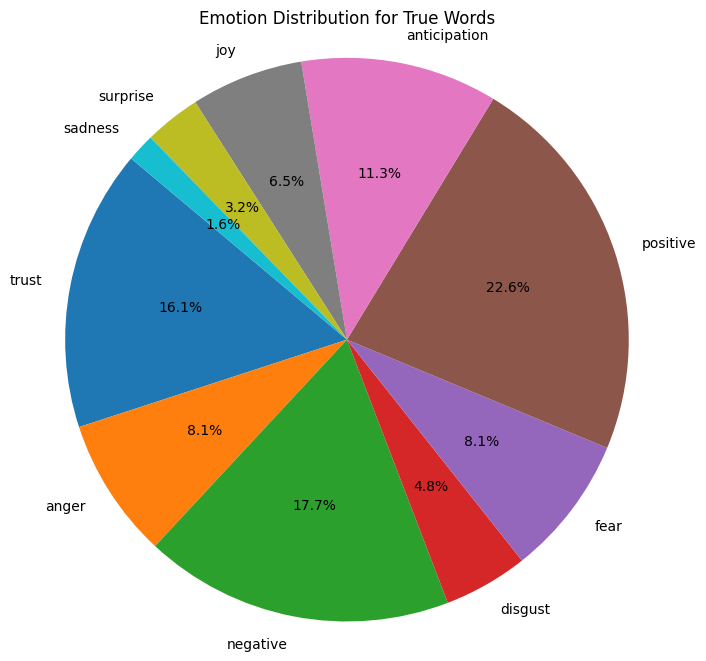

In [ ]:

# Extract data for the pie chart
labels_true = true_emotion_counts.keys()
sizes_true = true_emotion_counts.values()

# Create a pie chart for true word emotions
plt.figure(figsize=(8, 8))
plt.pie(sizes_true, labels=labels_true, autopct='%1.1f%%', startangle=140)
plt.title('Emotion Distribution for True Words')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the chart
plt.show()

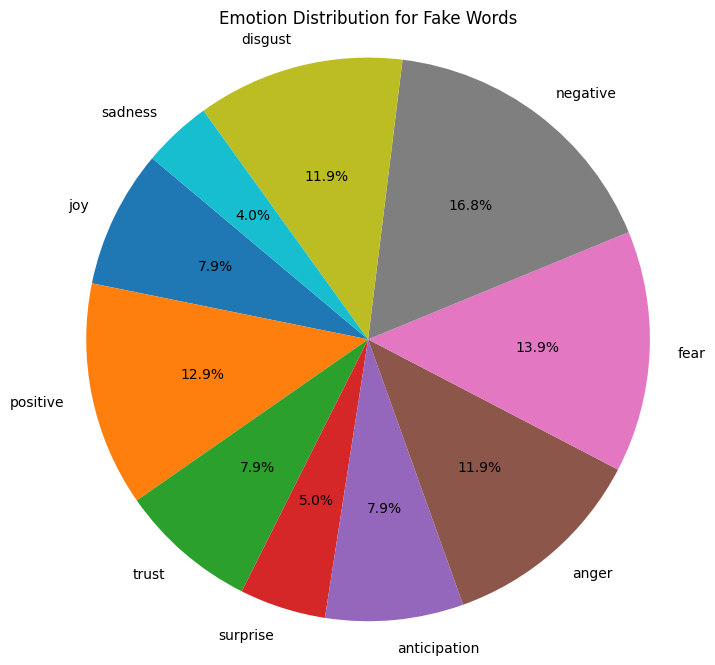

In [ ]:
# Extract data for the pie chart
labels_true = fake_emotion_counts.keys()
sizes_true = fake_emotion_counts.values()

# Create a pie chart for true word emotions
plt.figure(figsize=(8, 8))
plt.pie(sizes_true, labels=labels_true, autopct='%1.1f%%', startangle=140)
plt.title('Emotion Distribution for Fake Words')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the chart
plt.show()

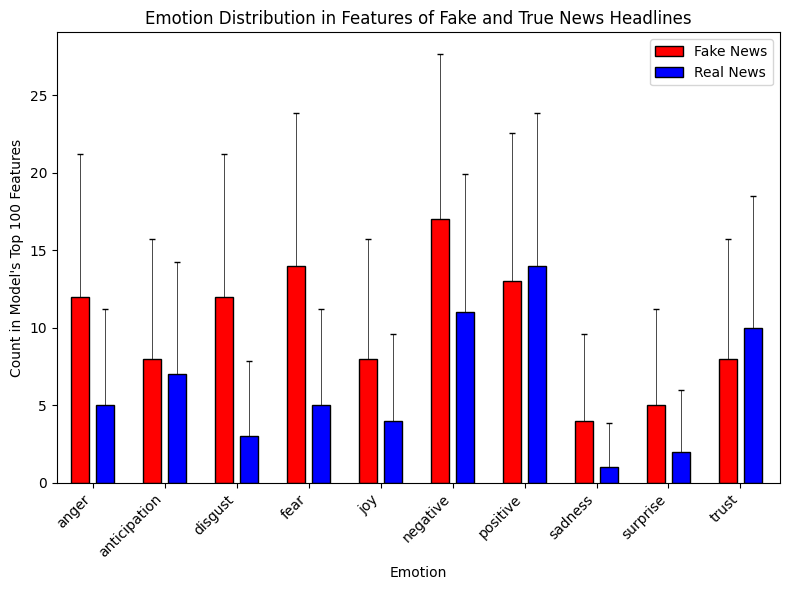

In [ ]:
import math

# Get a list of all unique emotions
all_emotions = set(fake_emotion_counts.keys()).union(set(true_emotion_counts.keys()))

# Sort the emotions alphabetically for consistent ordering
all_emotions = sorted(all_emotions)

# Create lists of counts for fake and true news, filling with zeros for missing emotions
fake_counts_list = [fake_emotion_counts.get(emotion, 0) for emotion in all_emotions]
true_counts_list = [true_emotion_counts.get(emotion, 0) for emotion in all_emotions]

fake_errors = []
true_errors = []
for i in range(len(all_emotions)):
  n = 100
  p_t = true_counts_list[i]/n
  p_f = fake_counts_list[i]/n
  s_t = math.sqrt((2* n*(1-p_t) * p_t)/(n-1))
  s_f = math.sqrt((2* n*(1-p_f) * p_f)/(n-1))
  n = 100
  fake_errors.append(2 * n * (s_f/math.sqrt(n)))
  true_errors.append(2 * n * (s_t/math.sqrt(n)))

emotion_data_df_long1 = pd.DataFrame(dict(emotion = all_emotions, count = fake_counts_list, error = fake_errors, fake = True))
emotion_data_df_long2 = pd.DataFrame(dict(emotion = all_emotions, count = true_counts_list, error = true_errors, fake = False))
emotion_data_df_long = pd.concat([emotion_data_df_long1, emotion_data_df_long2])
emotion_data_df_wide = pd.DataFrame(dict(emotion = all_emotions, count = fake_counts_list, true_count = true_counts_list, fake_err = fake_errors, true_err = true_errors))
emotion_data_df_long.to_csv("news_headlines_emotion_data_df_long.csv")
emotion_data_df_wide.to_csv("news_headlines_emotion_data_df_wide.csv")
# Create wider side-by-side bar chart
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.35  # the width of the bars
ind = np.arange(len(all_emotions))
# Fake News Bar Chart
# Graph code from https://stackoverflow.com/questions/45204202/change-error-bar-markers-caplines-in-pandas-bar-plot

plot1 = pd.Series(fake_counts_list).plot(kind='bar',yerr=fake_errors, color = "r",edgecolor='black',grid=False,figsize=(8,6),ax=ax,position=1.2,error_kw=dict(ecolor='black',elinewidth=0.5, lolims=True),width=0.25, label = "Fake News")
for ch in plot1.get_children():
  if str(ch).startswith('Line2D'): # this is silly, but it appears that the first Line in the children are the caplines...
    ch.set_marker('_')
    ch.set_markersize(5) # to change its size
#p1 = ax.bar(ind - width/2, fake_counts_list, width, label='Fake News')
#ax.errorbar(ind - width/2, fake_counts_list, yerr = fake_errors, fmt=".", color = "black")
# True News Bar Chart

plot2 = pd.Series(true_counts_list).plot(kind='bar',yerr=true_errors,color = "b",edgecolor='black',grid=False,figsize=(8,6),ax=ax,position=-0.2,error_kw=dict(ecolor='black',elinewidth=0.5, lolims=True),width=0.25, label = "Real News")
for ch in plot2.get_children():
  if str(ch).startswith('Line2D'): # this is silly, but it appears that the first Line in the children are the caplines...
    ch.set_marker('_')
    ch.set_markersize(5) # to change its size
        #p2 = ax.bar(ind + width/2, true_counts_list, width, label='True News')
#ax.errorbar(ind + width/2, true_counts_list, yerr = true_errors, fmt = ".", color ="black")

ax.set_xlim(left = -0.5)
ax.set_xticks(ind)
ax.set_xticklabels(all_emotions, rotation=45, ha='right')  # Rotate x-axis labels for better readability
ax.set_ylabel('Count in Model\'s Top 100 Features')
ax.set_xlabel('Emotion')
ax.set_title('Emotion Distribution in Features of Fake and True News Headlines')
ax.legend()

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [ ]:
#assessing emotion intensities of top words

# Access the NRC Emotion Intensity Lexicon
lexicon = pd.read_csv('/content/NRC-Emotion-Intensity-Lexicon-v1.txt', names=["word", "emotion", "intensity"], sep='\t', keep_default_na=False)

# Create a dictionary to map words to their intensity scores for each emotion
intensity_dict = {}

for index, row in lexicon.iterrows():
    word = row['word']
    emotion = row['emotion']
    intensity = row['intensity']

    # Create nested dictionaries for each word and emotion
    if word not in intensity_dict:
        intensity_dict[word] = {}

    intensity_dict[word][emotion] = intensity

# Function to get intensity for a word and emotion
def get_intensity(word, emotion):
    if word in intensity_dict and emotion in intensity_dict[word]:
        return intensity_dict[word][emotion]
    else:
        return 0

# Example: Get intensity for each word and emotion in true_word_emotions
true_intensity_results = {word: {emotion: get_intensity(word, emotion) for emotion in emotions} for word, emotions in true_word_emotions.items()}

# Example: Get intensity for each word and emotion in fake_word_emotions
fake_intensity_results = {word: {emotion: get_intensity(word, emotion) for emotion in emotions} for word, emotions in fake_word_emotions.items()}

# Print or use the intensity results as needed
print("True Word Emotion Intensities:", true_intensity_results)
print("Fake Word Emotion Intensities:", fake_intensity_results)


True Word Emotion Intensities: {'parliament': {'trust': 0.477}, 'opposition': {'anger': 0.469, 'negative': 0}, 'remains': {'disgust': 0.516, 'fear': 0.281, 'negative': 0, 'positive': 0, 'trust': 0.445}, 'seek': {'anticipation': 0.586}, 'inquiry': {'anticipation': 0.539, 'positive': 0}, 'quake': {'fear': 0.812}, 'coalition': {'positive': 0}, 'extend': {'positive': 0}, 'dispute': {'anger': 0.531, 'negative': 0}, 'alliance': {'trust': 0.727}, 'pacific': {'positive': 0}, 'trade': {'trust': 0.461}, 'weigh': {'anticipation': 0.414, 'trust': 0.344}, 'summons': {'negative': 0}, 'strengthen': {'positive': 0}, 'reform': {'positive': 0}, 'ministry': {'joy': 0.266, 'positive': 0, 'trust': 0.594}, 'separatist': {'anger': 0.438, 'disgust': 0.43, 'negative': 0}, 'improve': {'anticipation': 0.453, 'joy': 0.364, 'positive': 0, 'trust': 0.492}, 'missile': {'fear': 0.734}, 'independence': {'anticipation': 0.562, 'joy': 0.607, 'positive': 0, 'surprise': 0.242, 'trust': 0.547}, 'smuggling': {'negative': 0}

STAT SIGNIFICANCE CALCS: USA FAKE VS TRUE, HEADLINES

In [ ]:
import scipy
import math

In [ ]:
print(true_positive_sentiment_count)
print(true_negative_sentiment_count)
print(fake_positive_sentiment_count)
print(fake_negative_sentiment_count)

9
4
13
20


In [ ]:
# Classification of fake versus true news
# headlines from US news sites, sentiment quantity
n = 100
pos_t = true_positive_sentiment_count/n
neg_t = true_negative_sentiment_count/n
pos_f = fake_positive_sentiment_count/n
neg_f = fake_negative_sentiment_count/n
p_t = pos_t + neg_t
p_f = pos_f + neg_f
s_t = math.sqrt((2* n*(1-p_t) * p_t)/(n-1))
s_f = math.sqrt((2* n*(1-p_f) * p_f)/(n-1))
n = 100
t_value = (p_t - p_f)/math.sqrt((s_t*s_t)/n + (s_f*s_f)/n)
p_value = scipy.stats.norm.sf(abs(t_value))
print('Overall sentiment quantity significance: ')
print('t value is : ' + str(t_value))
print('p value is : ' + str(p_value))

s_t = math.sqrt((2* n*(1-neg_t) * neg_t)/(n-1))
s_f = math.sqrt((2* n*(1-neg_f) * neg_f)/(n-1))
n = 100
t_value = (neg_t - neg_f)/math.sqrt((s_t*s_t)/n + (s_f*s_f)/n)
p_value = scipy.stats.norm.sf(abs(t_value))
print('Negative sentiment quantity significance: ')
print('t value is : ' + str(t_value))
print('p value is : ' + str(p_value))


Overall sentiment quantity significance: 
t value is : -2.434049311388186
p value is : 0.007465480420762798
Negative sentiment quantity significance: 
t value is : -2.5272706175226958
p value is : 0.005747644419349151


In [ ]:
# Classification of fake versus true news
# headlines from US news sites, sentiment average
s_scores_true = list(sentiment_scores_true.values())
s_scores_fake = list(sentiment_scores_fake.values())
x_t = np.mean(s_scores_true)
x_f = np.mean(s_scores_fake)
s_t = np.std(s_scores_true)
s_f = np.std(s_scores_fake)
n = 100
t_value = (x_t - x_f)/math.sqrt((s_t*s_t)/n + (s_f*s_f)/n)
p_value = scipy.stats.norm.sf(abs(t_value))
print('Average sentiment significance: ')
print('t value is : ' + str(t_value))
print('p value is : ' + str(p_value))

Average sentiment significance: 
t value is : 1.3440658128779188
p value is : 0.08946355298020342


In [ ]:
print(np.mean(s_scores_true))
print(np.std(s_scores_true))
print(np.mean(s_scores_fake))
print(np.std(s_scores_fake))

0.015135000000000003
0.12825939604956824
-0.027687999999999994
0.29165138068591406


In [ ]:
print(num_true_words_with_emotion)
print(num_fake_words_with_emotion)

31
35


In [ ]:
# Classification of fake versus true news
# articles from US news sites, emotion quantity
n = 100
p_t = num_true_words_with_emotion/n
p_f = num_fake_words_with_emotion/n
s_t = math.sqrt((2* n*(1-p_t) * p_t)/(n-1))
s_f = math.sqrt((2* n*(1-p_f) * p_f)/(n-1))
n = 100
t_value = (p_t - p_f)/math.sqrt((s_t*s_t)/n + (s_f*s_f)/n)
p_value = scipy.stats.norm.sf(abs(t_value))
print("Emotion quantity significance: ")
print('t value is : ' + str(t_value))
print('p value is : ' + str(p_value))




Emotion quantity significance: 
t value is : -0.4235907096023716
p value is : 0.3359321659551021


In [ ]:
# Classification of fake versus true news
# articles from US news sites, emotion break down chart
print(all_emotions)
print(fake_counts_list)
print(true_counts_list)
print()
errors = []
for i, emotion in enumerate(all_emotions):
  n = 100
  p_t = true_counts_list[i]/n
  p_f = fake_counts_list[i]/n
  s_t = math.sqrt((2* n*(1-p_t) * p_t)/(n-1))
  s_f = math.sqrt((2* n*(1-p_f) * p_f)/(n-1))
  n = 100
  errors.append([s_t/math.sqrt(n), s_f/math.sqrt(n)])
  t_value = (p_t - p_f)/math.sqrt((s_t*s_t)/n + (s_f*s_f)/n)
  p_value = scipy.stats.norm.sf(abs(t_value))
  print(f"{emotion} emotion quantity significance: ")
  print('t value is : ' + str(t_value))
  print('p value is : ' + str(p_value))
  print()

print(f"stderrors: {errors}")

['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative', 'positive', 'sadness', 'surprise', 'trust']
[12, 8, 12, 14, 8, 17, 13, 4, 5, 8]
[5, 7, 3, 5, 4, 11, 14, 1, 2, 10]

anger emotion quantity significance: 
t value is : -1.2586733708449542
p value is : 0.1040741667956544

anticipation emotion quantity significance: 
t value is : -0.18891409796390768
p value is : 0.42508007197750164

disgust emotion quantity significance: 
t value is : -1.7252868455221726
p value is : 0.04223789569720056

fear emotion quantity significance: 
t value is : -1.5453247517740418
p value is : 0.061133865675569644

joy emotion quantity significance: 
t value is : -0.8409178658720822
p value is : 0.2001969744516901

negative emotion quantity significance: 
t value is : -0.8634852022823958
p value is : 0.1939353759795729

positive emotion quantity significance: 
t value is : 0.14559925641620147
p value is : 0.4421188775117373

sadness emotion quantity significance: 
t value is : -0.9603958811069552
p v